<a href="https://colab.research.google.com/github/wscottreynders/Alumni-Salaries-and-College-Acceptance/blob/main/College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
#drive.mount('/content/drive')

df = pd.read_csv('/content/ForbesAmericasTopColleges2019.csv')


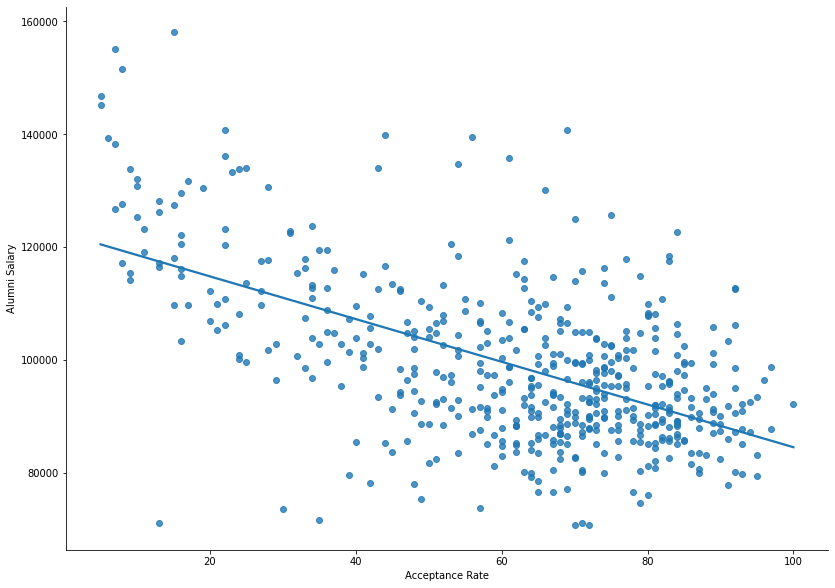

In [ ]:
import seaborn as sns

df = df.dropna()

df.head()

sns.lmplot(data=df, x='Acceptance Rate', y='Alumni Salary', ci =None, height=8.27, aspect=11.7/8.27)

In [ ]:
from statsmodels.formula.api import ols


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


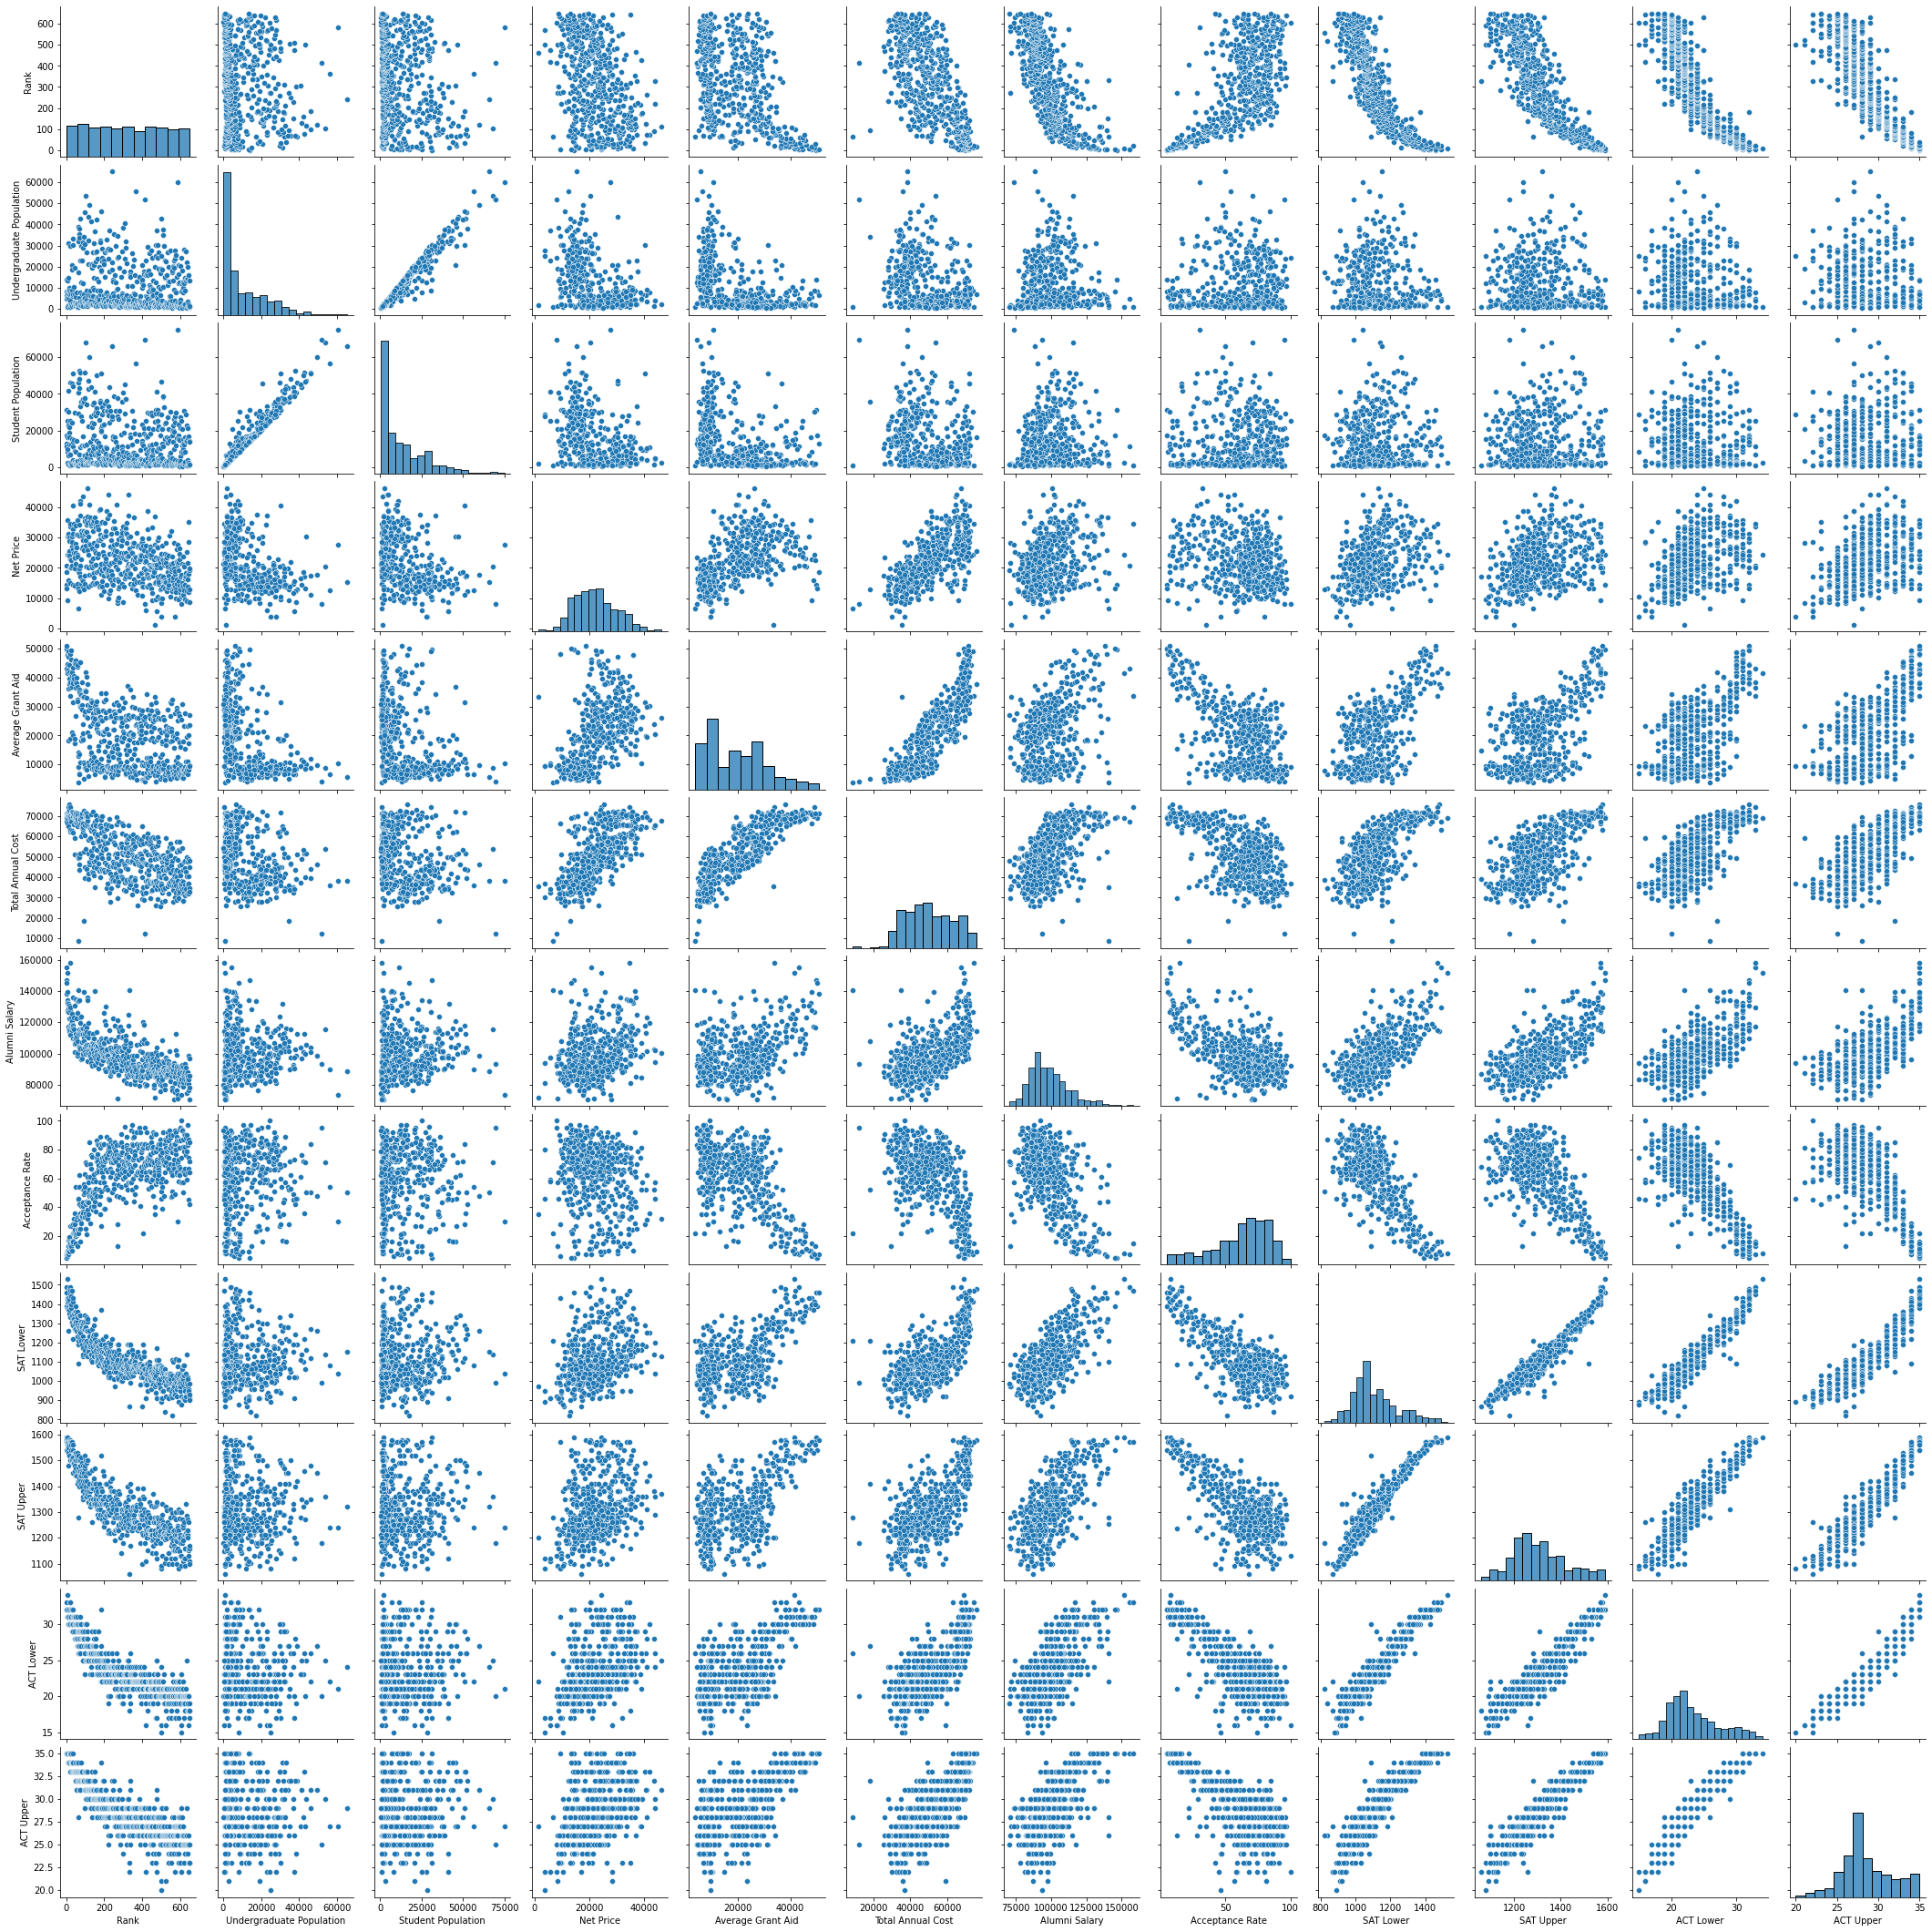

In [ ]:
sns.pairplot(df)

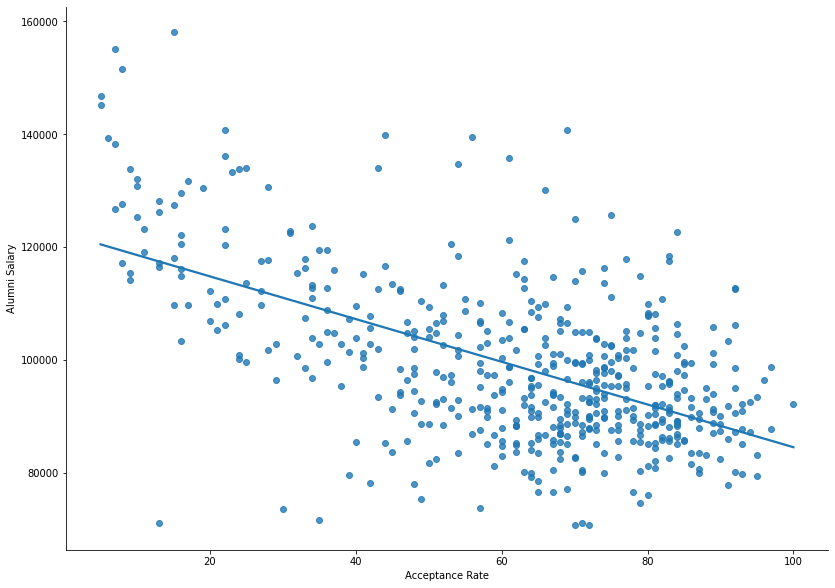

In [ ]:


sns.lmplot(data=df, x='Acceptance Rate', y='Alumni Salary', ci =None, height=8.27, aspect=11.7/8.27)
#sns.lmplot(data=df, x='Acceptance Rate', y='Rank', ci =None)
#sns.lmplot(data=df, x='Acceptance Rate', y='Alumni Salary', ci =None)

In [ ]:
df.columns = df.columns.str.replace(' ','_')


In [ ]:
df.head()

,Rank,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [ ]:
df['Acceptance_Rate_Decimal'] = df['Acceptance_Rate'] / 100

df.head()

,Rank,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Website,Acceptance_Rate_Decimal
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,0.05
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,0.05
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,0.07
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu,0.07
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu,0.06


In [ ]:
from statsmodels.formula.api import ols

model_1 = ols('Alumni_Salary ~ Acceptance_Rate_Decimal', data=df).fit()

slope = model_1.params[1]

intercept = model_1.params[0]

print(model_1.summary())



                            OLS Regression Results                            
Dep. Variable:          Alumni_Salary   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     254.1
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           7.02e-47
Time:                        15:44:59   Log-Likelihood:                -5652.6
No. Observations:                 523   AIC:                         1.131e+04
Df Residuals:                     521   BIC:                         1.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

The Null Hypothesis of the T test is that there is no significant coorelation between Variables.
The Alternative is that there is a correlation.

The Null Hypothesis: The slope is equal to zero or there is no relationship between X and Y

Alternative: THe slope is not zero. There is a relationship between X and Y.

There is a neagtive slope above indicating a negative correlation between school accpetance rate and Alumni salary. So the lower the acceptance rate, the higher the projected salary of the graduates will be.

$H_0: \mu_1 = \mu_2$ vs. $H_a: \mu_1 \neq \mu_2$

In [ ]:
predict_iceland = (1.224 * 10 ** 5)  + (-3.785 * 10 ** 4) * .05

print(predict_iceland)

120507.5


The low p value indicates that we should reject the null hypothesis that there is no correlation between acceptance rate and annual income.

In [ ]:
#df['Public_Private_Num'] = df['Public/Private'].replace({'Private': 0, 'Public': 1})
df.loc[(df['Public/Private'] == 'Private'), 'Public_Private_Num'] = 0
df.loc[(df['Public/Private'] == 'Public'), 'Public_Private_Num'] = 1

# Private is 0 and Public is 1

In [ ]:
df_Edit = df.drop(['City', 'State','Website', 'Public/Private','SAT_Lower', 'SAT_Upper', 'ACT_Lower', 'ACT_Upper', 'Acceptance_Rate'], axis=1)
df_Edit.head()

,Rank,Name,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate_Decimal,Public_Private_Num
0,1.0,Harvard University,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,0.05,0
1,2.0,Stanford University,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,0.05,0
2,3.0,Yale University,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,0.07,0
3,4.0,Massachusetts Institute of Technology,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,0.07,0
4,5.0,Princeton University,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,0.06,0


In [ ]:
model_1 = ols('Alumni_Salary ~ Acceptance_Rate_Decimal + Public_Private_Num', data=df).fit()

slope = model_1.params[1]

intercept = model_1.params[0]

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Alumni_Salary   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           9.33e-47
Time:                        18:52:58   Log-Likelihood:                -5649.8
No. Observations:                 523   AIC:                         1.131e+04
Df Residuals:                     520   BIC:                         1.132e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [ ]:
df_Edit['Public_Private_Num'].value_counts()

0    311
1    212
Name: Public_Private_Num, dtype: int64

In [ ]:
model_1 = ols('Alumni_Salary ~ Public_Private_Num', data=df_Edit).fit()

slope = model_1.params[1]

intercept = model_1.params[0]

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Alumni_Salary   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.778
Date:                Mon, 20 Sep 2021   Prob (F-statistic):             0.0962
Time:                        19:05:25   Log-Likelihood:                -5755.1
No. Observations:                 523   AIC:                         1.151e+04
Df Residuals:                     521   BIC:                         1.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.992e+04    826

Null: Private and Public schools are equal
Alternative: Private and public schools are not equal
The p value is .096 which is above .95 so I failed to reject the null hypothesis that private and public schools will have the same Alumni Salaries.

In [ ]:
Salary_Mean = df_Edit['Alumni_Salary'].mean()
Salary_Median = df_Edit['Alumni_Salary'].median()

#df_Edit.loc[(df_Edit['Alumni_Salary'] >= 99046), 'Salary_Dist'] = 0
#df_Edit.loc[(df_Edit['Alumni_Salary'] < 99046), 'Salary_Dist'] = 1

print(Salary_Mean)
print(Salary_Median)

99046.27151051625
96400.0


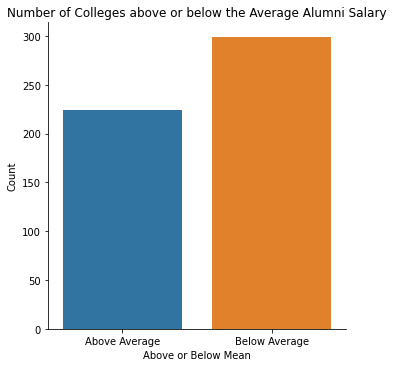

In [ ]:
import matplotlib.pyplot as plt
sns.catplot(x='Salary_Dist',data=df_Edit, kind='count')

plt.ylabel('Count') 
plt.xlabel('Above or Below Mean')
plt.title('Number of Colleges above or below the Average Alumni Salary') 
plt.xticks(ticks=[0,1], labels=['Above Average', 'Below Average'])

plt.show()

In [ ]:
#Private_Alumni = df_Edit[df_Edit['Public_Private_Num'] == 0]

#Private_Alumni.tail()



,Rank,Name,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate_Decimal,Public_Private_Num,Salary_Dist
644,645.0,Morehouse College,2202.0,2219.0,34928.0,17318.0,48723.0,98700.0,0.74,0,1.0
645,646.0,New Mexico State University,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,0.64,0,1.0
646,647.0,Indiana State University,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,0.85,0,1.0
647,648.0,Emory &amp; Henry College,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,0.72,0,1.0
649,650.0,Catawba College,1336.0,1463.0,19807.0,23662.0,44921.0,78100.0,0.42,0,1.0


In [ ]:
Pub_priv = pd.DataFrame(df['Public/Private'].value_counts())


Pub_priv.head()

,Public/Private
Private,311
Public,212


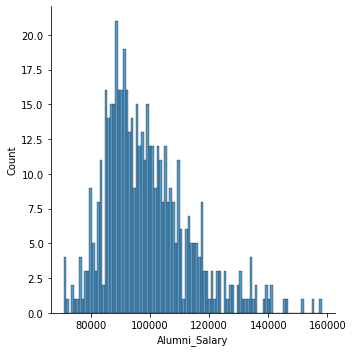

In [ ]:
sns.displot(df_Edit, x='Alumni_Salary', bins=100)

In [ ]:
Chi_Data = df_Edit.drop(['Name', 'Undergraduate_Population',	'Student_Population',	'Net_Price',	'Average_Grant_Aid',	'Total_Annual_Cost', 'Alumni_Salary',	'Acceptance_Rate_Decimal'	], axis=1)

In [ ]:
Chi_Data.head()

,Rank,Public_Private_Num,Salary_Dist
0,1.0,0,0.0
1,2.0,0,0.0
2,3.0,0,0.0
3,4.0,0,0.0
4,5.0,0,0.0


In [ ]:

Chi_Data_crosstab = pd.crosstab(index=Chi_Data['Public_Private_Num'], columns=Chi_Data['Salary_Dist'])
Chi_Data_crosstab

Salary_Dist,0.0,1.0
Public_Private_Num,,
0,139,172
1,85,127


In [ ]:
Chi_Data_crosstab_Margins = pd.crosstab(index=Chi_Data['Public_Private_Num'], columns=Chi_Data['Salary_Dist'], margins=True)
Chi_Data_crosstab_Margins

Salary_Dist,0.0,1.0,All
Public_Private_Num,,,
0,139,172,311
1,85,127,212
All,224,299,523


In [ ]:
Chi_Data_crosstab_norm = pd.crosstab(index=Chi_Data['Public_Private_Num'], columns=Chi_Data['Salary_Dist'], normalize='index')*100
Chi_Data_crosstab_norm

Salary_Dist,0.0,1.0
Public_Private_Num,,
0,44.694534,55.305466
1,40.094340,59.905660


In [ ]:
from scipy.stats import chi2_contingency

x, p_val, z, zz = chi2_contingency(pd.crosstab(index=Chi_Data['Public_Private_Num'], columns=Chi_Data['Salary_Dist']))

print('The p-value is:', p_val)

The p-value is: 0.34018413225610583
